4. De las llamadas contestadas se espera que al menos el 50% sean titulares, cuéntanos en el mes de septiembre, según tu análisis como estuvo este resultado?

In [1]:
#importo las librerias necesarias para responder la pregunta

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# importo el dataset

df_clean = pd.read_csv(r"data/df_clean.csv", sep=";")

In [3]:
# Filtro las llamadas contestadas
contestadas_true = df_clean[df_clean['Contacted'] == True]


# Calculo el porcentaje de llamadas contestadas
contestadas = len(contestadas_true)
contacto_si = len(contestadas_true[contestadas_true['contactability_type'] == 'Contacto sí'])
porcentaje_contacto_si = (contacto_si / contestadas) * 100

porcentaje_contacto_si

55.09306260575296

In [4]:

# Calculo el porcentaje de llamadas contestadas mediante "contact_confirmed"
contestadas_confirmadas = len(contestadas_true)
contacto_si = len(contestadas_true[contestadas_true['contact_confirmed'] == True])
porcentaje_contacto_si_confirmadas = (contacto_si / contestadas_confirmadas) * 100

porcentaje_contacto_si_confirmadas

56.852791878172596

In [5]:
# Ordeno el DataFrame por "Phone" y "DATE" en orden descendente (el más reciente primero)
contestadas_true = contestadas_true.sort_values(by=['Phone', 'date'], ascending=[True, False])

# Identifico registros duplicados en la columna "Phone"
duplicates = contestadas_true.duplicated(subset='Phone', keep=False)

# Identifico registros con 'contact_confirmed' igual a True
confirmed = contestadas_true['contact_confirmed'] == True

# Identifico registros con 'contact_confirmed' igual a False
not_confirmed = contestadas_true['contact_confirmed'] == False

# Elimino los valores repetidos en la columna "Phone", teniendo en cuenta que solo quiero conservar el mas reciente que sea True en la columna contact_confirmed, o el mas reciente si son todos False
result_true = contestadas_true[confirmed].sort_values(by=['Phone', 'date'], ascending=[True, False]).drop_duplicates(subset='Phone', keep='first')
result_false = contestadas_true[not_confirmed].sort_values(by=['Phone', 'date'], ascending=[True, False]).drop_duplicates(subset='Phone', keep='first')
result_mixed = contestadas_true[duplicates & (confirmed)].sort_values(by=['Phone', 'date'], ascending=[True, False]).drop_duplicates(subset='Phone', keep='first')

# Concateno los resultados en un solo DataFrame
contestadas_filtered = pd.concat([result_true, result_false, result_mixed])

# Calcular el porcentaje de "Contacto SI" basado en estos datos
total_contacted = len(contestadas_filtered)
contacto_si_unicos = len(contestadas_filtered[contestadas_filtered['contact_confirmed'] == True])
porcentaje_contacto_si_unicos = (contacto_si_unicos / total_contacted) * 100

porcentaje_contacto_si_unicos

63.52900312608545

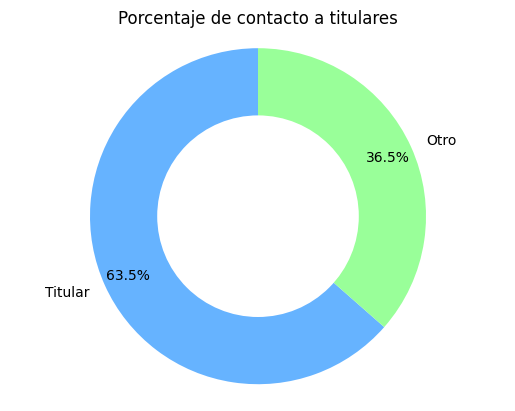

In [6]:
# cuento los valores de 'contact_confirmed'
confirmed_count = contestadas_filtered[contestadas_filtered['contact_confirmed'] == True]['contact_confirmed'].count()
not_confirmed_count = contestadas_filtered[contestadas_filtered['contact_confirmed'] == False]['contact_confirmed'].count()

labels = ['Titular', 'Otro']
sizes = [confirmed_count, not_confirmed_count]
colors = ['#66b3ff', '#99ff99']


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title("Porcentaje de contacto a titulares")

plt.axis('equal')
plt.show()

En general, el porcentaje de llamadas contestadas fue del 55.09%. Considerando el campo "contactability_type" en el que, según el diccionario de datos, "Contacto Sí" confirma que se trata de un usuario titular.

Luego incluyo registros donde la titularidad se confirma a través de la columna "contact_confirmed," en este caso, se obtiene un resultado del 56.86%.

Continuando con el enfoque en el índice de contactabilidad, se procedió a eliminar las llamadas duplicadas que podrían distorsionar los datos. Esto se debe a que en las llamadas en las que el usuario no confirma ser titular o en las que atiende otra persona, es probable que se realicen nuevos intentos de llamada en futuras campañas. En este escenario, el porcentaje de contactación de titulares alcanza el 63.53%.